In [1]:
%cd C:/Users/sylee/Documents/GitHub/DataSafe/DataSafe

C:\Users\sylee\Documents\GitHub\DataSafe\DataSafe


In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
path1 = 'C:/Users/sylee/Documents/GitHub/DataSafe/DataSafe/92dataset.csv'
df = pd.read_csv(path1)
df

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,강원도,강릉시,28.083333,56.750000,79.583333,24.083333,69.666667,53.083333,311.250000,0.993728,...,1.9,1.4,-4.765,-0.06,13.51,253.45,260.93,337.66,1292.13,1.046
1,강원도,고성군,18.833333,35.416667,27.833333,7.583333,51.583333,18.083333,159.333333,0.999529,...,0.3,0.1,7.355,-0.08,36.41,245.63,276.25,363.99,1339.71,0.468
2,강원도,동해시,16.000000,11.583333,20.666667,13.000000,24.000000,9.666667,94.916667,0.909972,...,0.7,0.4,-12.665,-0.03,15.88,187.19,190.97,250.96,955.67,0.862
3,강원도,삼척시,27.000000,17.000000,26.916667,8.416667,58.166667,23.083333,160.583333,1.000000,...,0.5,0.2,-4.845,-0.01,22.84,164.70,181.63,265.87,928.88,0.697
4,강원도,속초시,25.333333,22.166667,43.666667,12.916667,24.083333,16.333333,144.500000,0.954525,...,0.8,0.4,-6.230,-0.44,7.13,262.22,265.45,322.82,1284.43,0.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,인천광역시,부평구,1.666667,17.583333,55.166667,22.083333,0.333333,13.166667,110.000000,1.000000,...,1.6,1.9,4.955,4.50,-0.50,262.09,342.59,384.32,4717.64,1.132
88,인천광역시,서구,13.333333,63.916667,125.250000,21.083333,11.500000,13.250000,248.333333,1.000000,...,1.8,2.2,6.465,18.40,31.00,340.56,444.66,413.99,5558.38,1.311
89,인천광역시,연수구,7.083333,46.166667,117.083333,18.916667,6.833333,17.916667,214.000000,0.901417,...,1.3,1.8,2.380,10.48,12.79,442.52,501.54,419.18,6291.41,1.501
90,인천광역시,옹진군,22.500000,15.583333,5.416667,2.000000,45.083333,4.750000,95.333333,1.000000,...,0.2,0.0,6.945,-6.28,9.73,24.18,38.62,62.74,615.39,0.161


In [4]:
x = df.iloc[:,2:]
x

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,28.083333,56.750000,79.583333,24.083333,69.666667,53.083333,311.250000,0.993728,79.566831,9.759298,...,1.9,1.4,-4.765,-0.06,13.51,253.45,260.93,337.66,1292.13,1.046
1,18.833333,35.416667,27.833333,7.583333,51.583333,18.083333,159.333333,0.999529,82.520355,8.309360,...,0.3,0.1,7.355,-0.08,36.41,245.63,276.25,363.99,1339.71,0.468
2,16.000000,11.583333,20.666667,13.000000,24.000000,9.666667,94.916667,0.909972,67.485992,6.898456,...,0.7,0.4,-12.665,-0.03,15.88,187.19,190.97,250.96,955.67,0.862
3,27.000000,17.000000,26.916667,8.416667,58.166667,23.083333,160.583333,1.000000,87.481567,5.956220,...,0.5,0.2,-4.845,-0.01,22.84,164.70,181.63,265.87,928.88,0.697
4,25.333333,22.166667,43.666667,12.916667,24.083333,16.333333,144.500000,0.954525,69.939210,7.354720,...,0.8,0.4,-6.230,-0.44,7.13,262.22,265.45,322.82,1284.43,0.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.666667,17.583333,55.166667,22.083333,0.333333,13.166667,110.000000,1.000000,22.219756,3.511367,...,1.6,1.9,4.955,4.50,-0.50,262.09,342.59,384.32,4717.64,1.132
88,13.333333,63.916667,125.250000,21.083333,11.500000,13.250000,248.333333,1.000000,18.971929,11.065046,...,1.8,2.2,6.465,18.40,31.00,340.56,444.66,413.99,5558.38,1.311
89,7.083333,46.166667,117.083333,18.916667,6.833333,17.916667,214.000000,0.901417,5.215615,1.395477,...,1.3,1.8,2.380,10.48,12.79,442.52,501.54,419.18,6291.41,1.501
90,22.500000,15.583333,5.416667,2.000000,45.083333,4.750000,95.333333,1.000000,72.373252,17.218051,...,0.2,0.0,6.945,-6.28,9.73,24.18,38.62,62.74,615.39,0.161


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
##
scaler = StandardScaler()   

standardized_data = scaler.fit_transform(x)
standardized_data = pd.DataFrame(standardized_data, columns=x.columns)
##
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(standardized_data)

x = pd.DataFrame(data, columns=x.columns)
x




,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,0.890006,0.253801,...,0.53125,0.388889,0.124808,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341
1,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,0.923043,0.216093,...,0.03125,0.027778,0.191154,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400
2,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,0.754874,0.179401,...,0.15625,0.111111,0.081563,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622
3,0.644711,0.181373,0.061108,0.111111,0.834928,0.226749,0.276878,1.000000,0.978538,0.154898,...,0.09375,0.055556,0.124370,0.300968,0.353636,0.168314,0.134740,0.257485,0.024908,0.325440
4,0.604790,0.242157,0.108716,0.189033,0.345694,0.155004,0.243248,0.937915,0.782315,0.191267,...,0.18750,0.111111,0.116789,0.296395,0.239722,0.285122,0.213712,0.329674,0.053157,0.446873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.037924,0.188235,0.141402,0.347763,0.004785,0.121346,0.171110,1.000000,0.248542,0.091317,...,0.43750,0.527778,0.178016,0.348931,0.184396,0.284967,0.286391,0.407631,0.325936,0.589557
88,0.317365,0.733333,0.340597,0.330447,0.165072,0.122232,0.460359,1.000000,0.212213,0.287758,...,0.50000,0.611111,0.186282,0.496756,0.412805,0.378957,0.382559,0.445240,0.392735,0.698239
89,0.167665,0.524510,0.317385,0.292929,0.098086,0.171833,0.388569,0.865410,0.058340,0.036291,...,0.34375,0.500000,0.163921,0.412528,0.280763,0.501084,0.436149,0.451819,0.450977,0.813600
90,0.536926,0.164706,0.000000,0.000000,0.647129,0.031887,0.140443,1.000000,0.809542,0.447773,...,0.00000,0.000000,0.188910,0.234287,0.258574,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# pca = PCA(n_components = 15)
# pca.fit(x)
# for i in range(15) :
#     print("{}번째 차원 설명력: {}".format(i+1,round(pca.explained_variance_ratio_[i],2)))
#     print("{}번째까지의 설명력: {}".format(i+1,round(np.cumsum(pca.explained_variance_ratio_)[i],2)))
#     print("--------------------------------------------")


1번째 차원 설명력: 0.43
1번째까지의 설명력: 0.43
--------------------------------------------
2번째 차원 설명력: 0.18
2번째까지의 설명력: 0.61
--------------------------------------------
3번째 차원 설명력: 0.07
3번째까지의 설명력: 0.67
--------------------------------------------
4번째 차원 설명력: 0.06
4번째까지의 설명력: 0.74
--------------------------------------------
5번째 차원 설명력: 0.05
5번째까지의 설명력: 0.79
--------------------------------------------
6번째 차원 설명력: 0.04
6번째까지의 설명력: 0.82
--------------------------------------------
7번째 차원 설명력: 0.03
7번째까지의 설명력: 0.85
--------------------------------------------
8번째 차원 설명력: 0.02
8번째까지의 설명력: 0.87
--------------------------------------------
9번째 차원 설명력: 0.02
9번째까지의 설명력: 0.89
--------------------------------------------
10번째 차원 설명력: 0.02
10번째까지의 설명력: 0.91
--------------------------------------------
11번째 차원 설명력: 0.02
11번째까지의 설명력: 0.93
--------------------------------------------
12번째 차원 설명력: 0.01
12번째까지의 설명력: 0.94
--------------------------------------------
13번째 차원 설명력: 0.01
13번째까지의 설명력: 0.95
----------

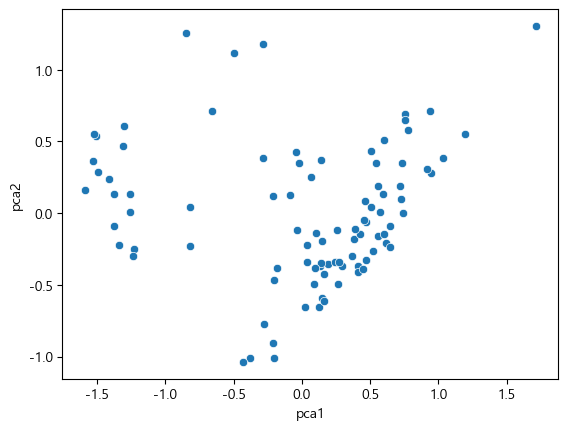

<Figure size 1500x1500 with 0 Axes>

In [7]:
# pca = PCA(n_components = 2)  #2차원으로 pca 진행

# pca_data = pca.fit_transform(x) #데이터 변환 후 변수에 저장

# df['pca1'] = pca_data[:,0] #데이터파일에 pca변수 추가
# df['pca2'] = pca_data[:,1]

# sns.scatterplot(x = df['pca1'], y=df['pca2'])
# plt.figure(figsize=(15,15))
# plt.show()

C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 2 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 2 7 3 3 7 7 3 7 0 7 7 3 7 3 3 3 7 0 3 0
 3 0 5 5 3 7 3 3 5 5 5 3 5 5 7 8 7 3 8 3 3 3 3 7 3 3 3 1 3 8 3 3 8 3 1 3 3
 1 1 3 7 3 0 0 3 6 3 7 5 7 7 8 1 6 1]


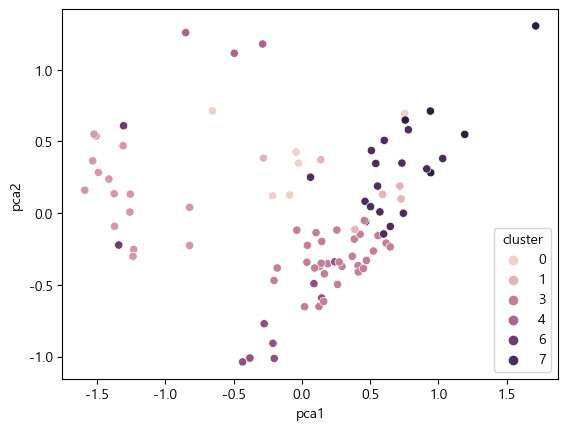

<Figure size 1500x1200 with 0 Axes>

In [8]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300,random_state=0)
# kmeans.fit(x)

# print(kmeans.labels_)
# df['cluster'] = kmeans.labels_  # 각 군집에 해당하는 행정동을 파악하기 위해 라벨 값을 칼럼으로 추가

# sns.scatterplot(x = df['pca1'], y=df['pca2'], hue=df['cluster'])
# plt.figure(figsize=(15,12))
# plt.show()

In [6]:
df

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,강원도,강릉시,28.083333,56.750000,79.583333,24.083333,69.666667,53.083333,311.250000,0.993728,...,1.9,1.4,-4.765,-0.06,13.51,253.45,260.93,337.66,1292.13,1.046
1,강원도,고성군,18.833333,35.416667,27.833333,7.583333,51.583333,18.083333,159.333333,0.999529,...,0.3,0.1,7.355,-0.08,36.41,245.63,276.25,363.99,1339.71,0.468
2,강원도,동해시,16.000000,11.583333,20.666667,13.000000,24.000000,9.666667,94.916667,0.909972,...,0.7,0.4,-12.665,-0.03,15.88,187.19,190.97,250.96,955.67,0.862
3,강원도,삼척시,27.000000,17.000000,26.916667,8.416667,58.166667,23.083333,160.583333,1.000000,...,0.5,0.2,-4.845,-0.01,22.84,164.70,181.63,265.87,928.88,0.697
4,강원도,속초시,25.333333,22.166667,43.666667,12.916667,24.083333,16.333333,144.500000,0.954525,...,0.8,0.4,-6.230,-0.44,7.13,262.22,265.45,322.82,1284.43,0.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,인천광역시,부평구,1.666667,17.583333,55.166667,22.083333,0.333333,13.166667,110.000000,1.000000,...,1.6,1.9,4.955,4.50,-0.50,262.09,342.59,384.32,4717.64,1.132
88,인천광역시,서구,13.333333,63.916667,125.250000,21.083333,11.500000,13.250000,248.333333,1.000000,...,1.8,2.2,6.465,18.40,31.00,340.56,444.66,413.99,5558.38,1.311
89,인천광역시,연수구,7.083333,46.166667,117.083333,18.916667,6.833333,17.916667,214.000000,0.901417,...,1.3,1.8,2.380,10.48,12.79,442.52,501.54,419.18,6291.41,1.501
90,인천광역시,옹진군,22.500000,15.583333,5.416667,2.000000,45.083333,4.750000,95.333333,1.000000,...,0.2,0.0,6.945,-6.28,9.73,24.18,38.62,62.74,615.39,0.161


In [7]:
x

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,0.890006,0.253801,...,0.53125,0.388889,0.124808,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341
1,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,0.923043,0.216093,...,0.03125,0.027778,0.191154,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400
2,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,0.754874,0.179401,...,0.15625,0.111111,0.081563,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622
3,0.644711,0.181373,0.061108,0.111111,0.834928,0.226749,0.276878,1.000000,0.978538,0.154898,...,0.09375,0.055556,0.124370,0.300968,0.353636,0.168314,0.134740,0.257485,0.024908,0.325440
4,0.604790,0.242157,0.108716,0.189033,0.345694,0.155004,0.243248,0.937915,0.782315,0.191267,...,0.18750,0.111111,0.116789,0.296395,0.239722,0.285122,0.213712,0.329674,0.053157,0.446873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.037924,0.188235,0.141402,0.347763,0.004785,0.121346,0.171110,1.000000,0.248542,0.091317,...,0.43750,0.527778,0.178016,0.348931,0.184396,0.284967,0.286391,0.407631,0.325936,0.589557
88,0.317365,0.733333,0.340597,0.330447,0.165072,0.122232,0.460359,1.000000,0.212213,0.287758,...,0.50000,0.611111,0.186282,0.496756,0.412805,0.378957,0.382559,0.445240,0.392735,0.698239
89,0.167665,0.524510,0.317385,0.292929,0.098086,0.171833,0.388569,0.865410,0.058340,0.036291,...,0.34375,0.500000,0.163921,0.412528,0.280763,0.501084,0.436149,0.451819,0.450977,0.813600
90,0.536926,0.164706,0.000000,0.000000,0.647129,0.031887,0.140443,1.000000,0.809542,0.447773,...,0.00000,0.000000,0.188910,0.234287,0.258574,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
a = df.iloc[:,:2]
a

,광역시도,시군구명
0,강원도,강릉시
1,강원도,고성군
2,강원도,동해시
3,강원도,삼척시
4,강원도,속초시
...,...,...
87,인천광역시,부평구
88,인천광역시,서구
89,인천광역시,연수구
90,인천광역시,옹진군


In [9]:
b = x
x

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,0.890006,0.253801,...,0.53125,0.388889,0.124808,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341
1,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,0.923043,0.216093,...,0.03125,0.027778,0.191154,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400
2,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,0.754874,0.179401,...,0.15625,0.111111,0.081563,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622
3,0.644711,0.181373,0.061108,0.111111,0.834928,0.226749,0.276878,1.000000,0.978538,0.154898,...,0.09375,0.055556,0.124370,0.300968,0.353636,0.168314,0.134740,0.257485,0.024908,0.325440
4,0.604790,0.242157,0.108716,0.189033,0.345694,0.155004,0.243248,0.937915,0.782315,0.191267,...,0.18750,0.111111,0.116789,0.296395,0.239722,0.285122,0.213712,0.329674,0.053157,0.446873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.037924,0.188235,0.141402,0.347763,0.004785,0.121346,0.171110,1.000000,0.248542,0.091317,...,0.43750,0.527778,0.178016,0.348931,0.184396,0.284967,0.286391,0.407631,0.325936,0.589557
88,0.317365,0.733333,0.340597,0.330447,0.165072,0.122232,0.460359,1.000000,0.212213,0.287758,...,0.50000,0.611111,0.186282,0.496756,0.412805,0.378957,0.382559,0.445240,0.392735,0.698239
89,0.167665,0.524510,0.317385,0.292929,0.098086,0.171833,0.388569,0.865410,0.058340,0.036291,...,0.34375,0.500000,0.163921,0.412528,0.280763,0.501084,0.436149,0.451819,0.450977,0.813600
90,0.536926,0.164706,0.000000,0.000000,0.647129,0.031887,0.140443,1.000000,0.809542,0.447773,...,0.00000,0.000000,0.188910,0.234287,0.258574,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
c = df.iloc[:,-3:]
c

,pca1,pca2,cluster
0,-0.850741,1.259255,4
1,-1.490733,0.283758,2
2,-0.822217,-0.225585,2
3,-1.532495,0.364764,2
4,-0.821953,0.041030,2
...,...,...,...
87,0.743819,-0.000294,7
88,0.757691,0.649450,8
89,0.592258,0.130615,1
90,-1.341920,-0.222209,6


In [10]:
x.corr()

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
기타관광,1.000000,0.375433,0.081352,-0.168437,0.765041,0.455164,0.479180,-1.411677e-02,0.512625,0.386168,...,-0.197722,-0.348195,-0.183222,-0.280059,0.442346,-0.187695,-0.185614,-0.197225,-0.425989,-0.317691
레저스포츠,0.375433,1.000000,0.480203,0.201678,0.417858,0.372431,0.754075,1.817564e-01,0.089129,0.237847,...,0.519007,0.448991,0.119401,0.145945,0.237319,0.340430,0.366387,0.288897,0.138909,0.326530
문화관광,0.081352,0.480203,1.000000,0.489264,-0.130076,0.309934,0.830495,1.552228e-01,-0.256967,-0.073097,...,0.650461,0.492954,0.286284,0.461043,-0.007089,0.239514,0.366826,0.205501,0.321455,0.529980
쇼핑,-0.168437,0.201678,0.489264,1.000000,-0.236344,0.044892,0.407186,1.248856e-01,-0.455579,-0.282981,...,0.641147,0.478908,0.264595,0.330029,-0.231831,0.172183,0.280435,0.197867,0.382410,0.558569
자연관광,0.765041,0.417858,-0.130076,-0.236344,1.000000,0.494156,0.381708,1.971514e-02,0.596618,0.385021,...,-0.232373,-0.314080,-0.203916,-0.379185,0.481953,-0.072592,-0.123739,-0.082598,-0.374211,-0.367024
역사.체험관광,0.455164,0.372431,0.309934,0.044892,0.494156,1.000000,0.647133,1.219573e-01,0.363739,0.320235,...,0.156923,0.056168,-0.094160,-0.171217,0.090796,0.140687,0.093663,0.147598,0.020753,0.007224
총 관광지 수,0.479180,0.754075,0.830495,0.407186,0.381708,0.647133,1.000000,1.804248e-01,0.065068,0.166095,...,0.558566,0.372036,0.152303,0.210450,0.188617,0.240463,0.316890,0.209218,0.155990,0.357992
도시비율,-0.014117,0.181756,0.155223,0.124886,0.019715,0.121957,0.180425,1.000000e+00,0.260539,0.147512,...,0.164347,0.142161,0.134226,-0.008223,-0.009703,0.191739,0.147796,0.172066,0.079136,0.141171
임야면적 비율,0.512625,0.089129,-0.256967,-0.455579,0.596618,0.363739,0.065068,2.605395e-01,1.000000,0.301299,...,-0.373690,-0.371381,-0.339764,-0.418144,0.332649,-0.011398,-0.197968,-0.037713,-0.432307,-0.558971
농업용지 비율,0.386168,0.237847,-0.073097,-0.282981,0.385021,0.320235,0.166095,1.475119e-01,0.301299,1.000000,...,-0.062143,-0.009227,-0.160305,-0.138723,0.324921,0.177128,0.097367,0.068499,0.004334,-0.127847


C:\Users\sylee\AppData\Local\Temp\ipykernel_19988\2953352949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = df.corr()
C:\Users\sylee\AppData\Local\Temp\ipykernel_19988\2953352949.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(X, dtype=np.bool)


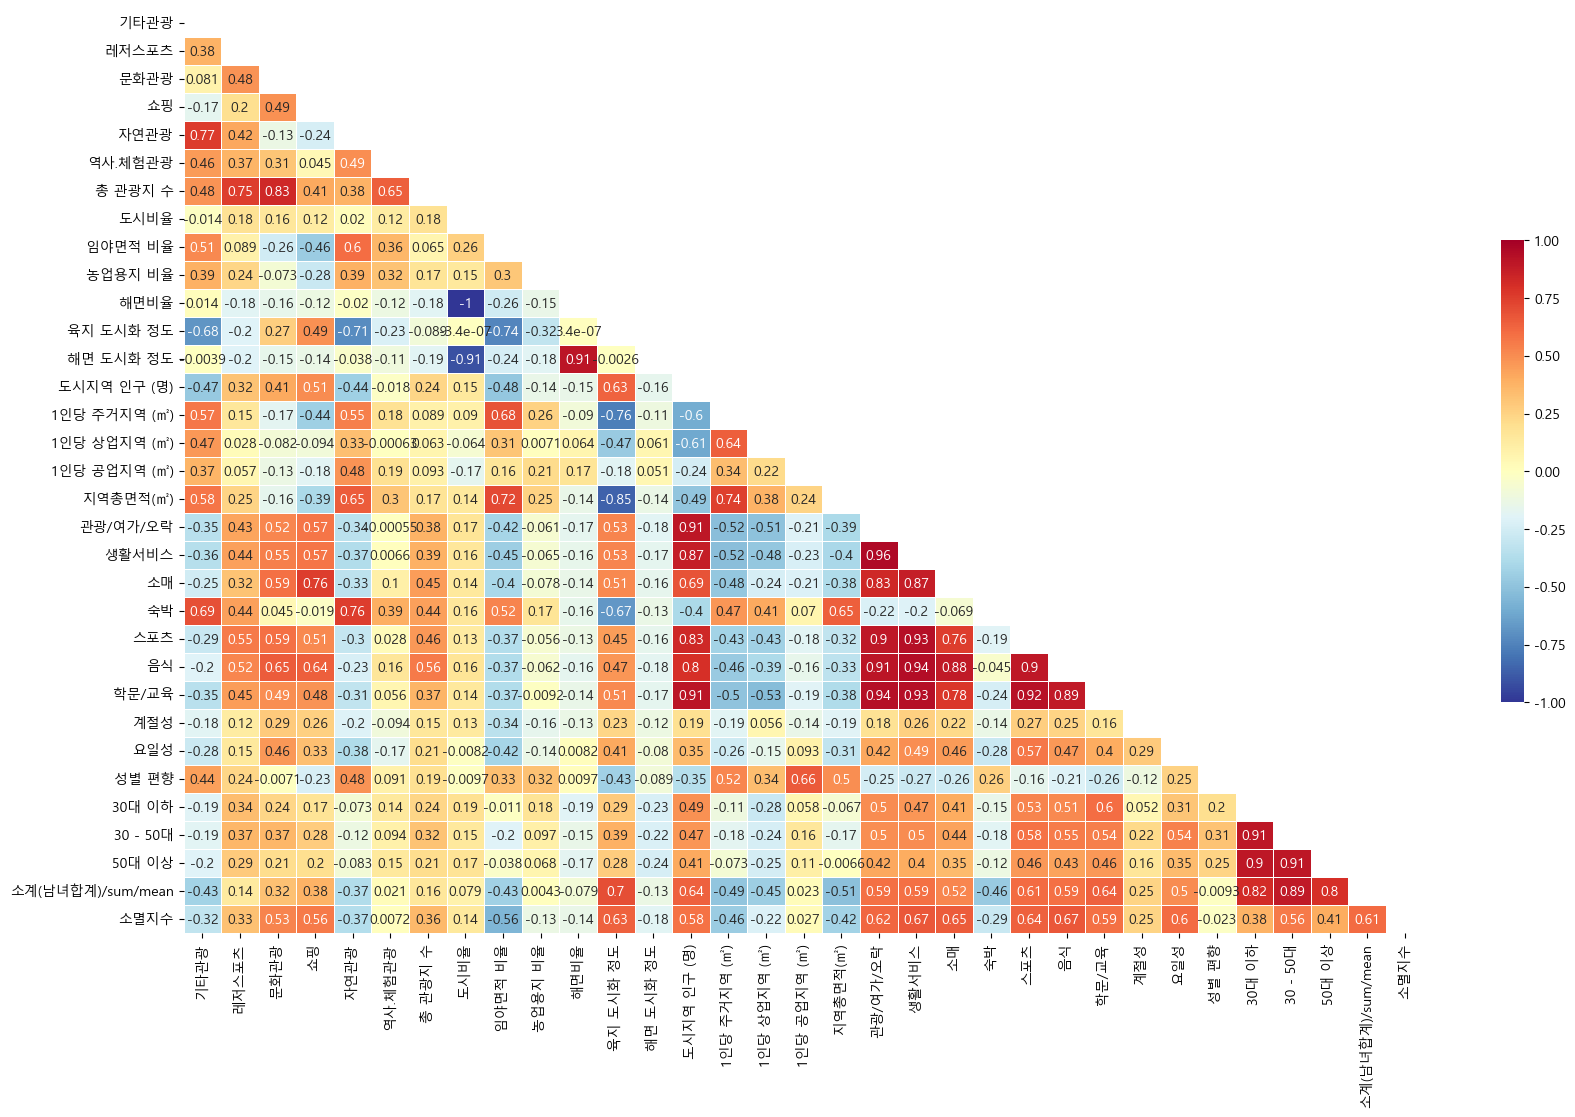

In [11]:
X = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(20,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(X, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(X, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1 ,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

C:\Users\sylee\AppData\Local\Temp\ipykernel_19988\108473834.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(X, dtype=np.bool)


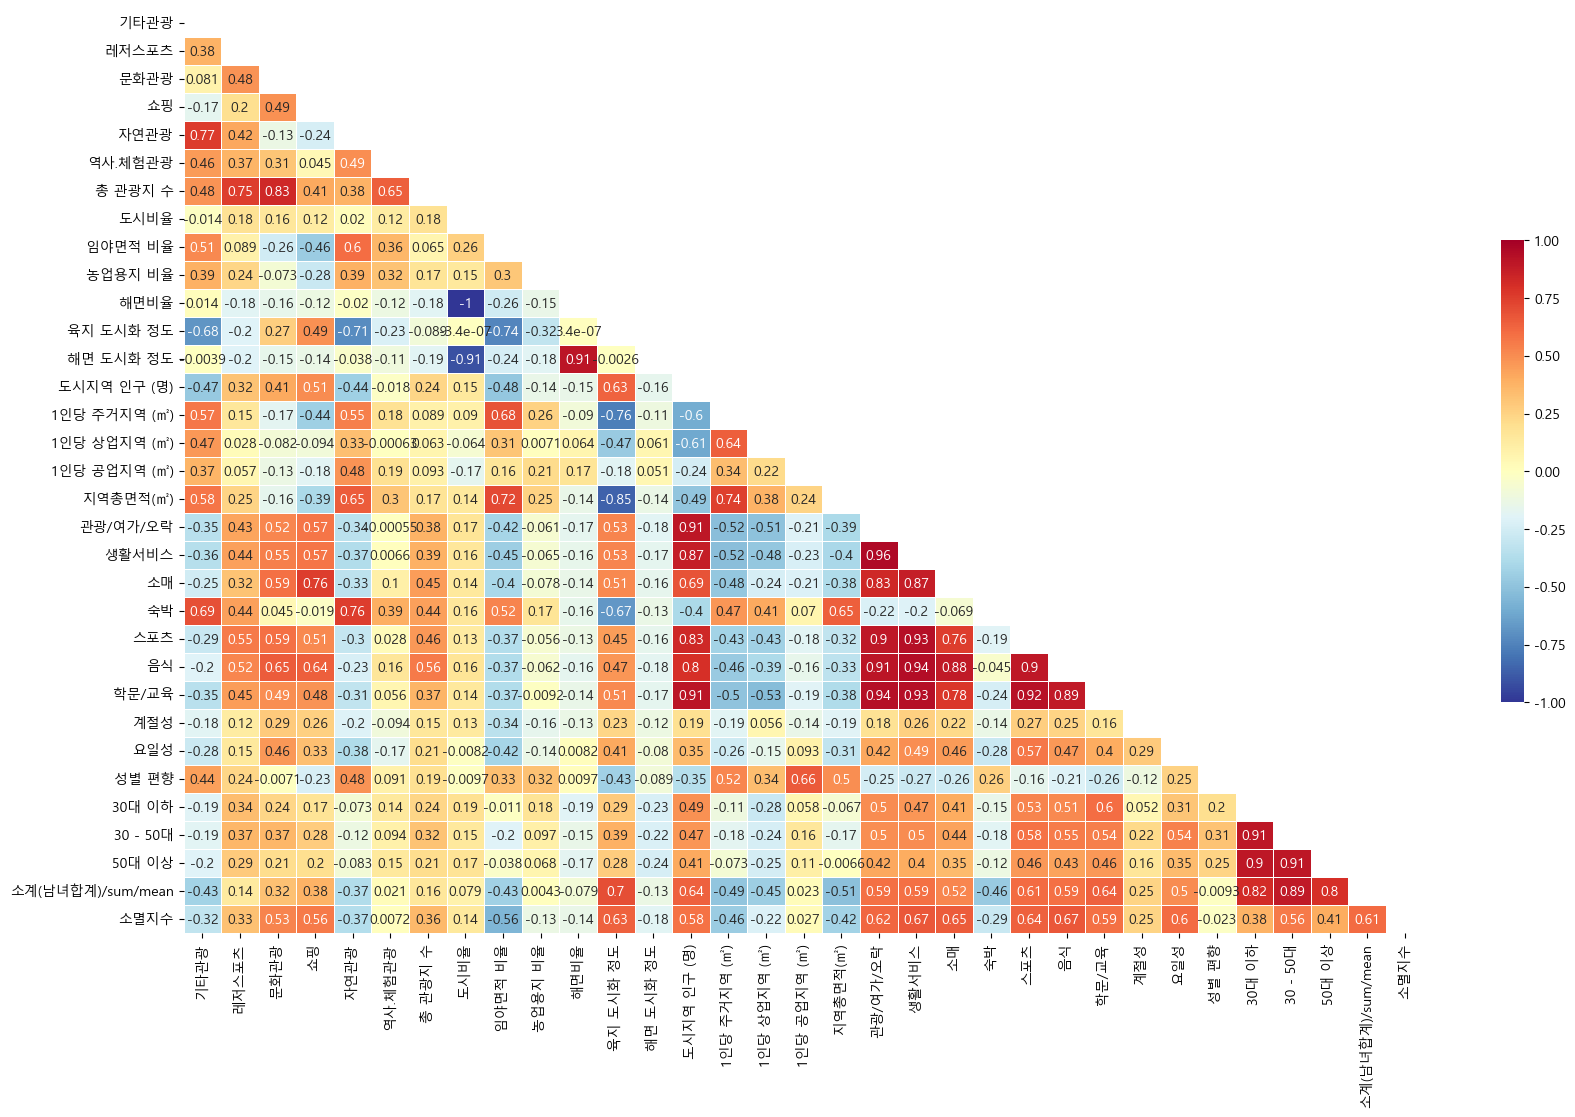

In [12]:
X = x.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(20,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(X, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(X, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1 ,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [16]:
df1 = pd.concat([a, b, c], axis=1)

In [17]:
df1

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,...,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수,pca1,pca2,cluster
0,강원도,강릉시,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,...,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341,-0.850741,1.259255,4
1,강원도,고성군,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,...,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400,-1.490733,0.283758,2
2,강원도,동해시,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,...,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622,-0.822217,-0.225585,2
3,강원도,삼척시,0.644711,0.181373,0.061108,0.111111,0.834928,0.226749,0.276878,1.000000,...,0.300968,0.353636,0.168314,0.134740,0.257485,0.024908,0.325440,-1.532495,0.364764,2
4,강원도,속초시,0.604790,0.242157,0.108716,0.189033,0.345694,0.155004,0.243248,0.937915,...,0.296395,0.239722,0.285122,0.213712,0.329674,0.053157,0.446873,-0.821953,0.041030,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,인천광역시,부평구,0.037924,0.188235,0.141402,0.347763,0.004785,0.121346,0.171110,1.000000,...,0.348931,0.184396,0.284967,0.286391,0.407631,0.325936,0.589557,0.743819,-0.000294,7
88,인천광역시,서구,0.317365,0.733333,0.340597,0.330447,0.165072,0.122232,0.460359,1.000000,...,0.496756,0.412805,0.378957,0.382559,0.445240,0.392735,0.698239,0.757691,0.649450,8
89,인천광역시,연수구,0.167665,0.524510,0.317385,0.292929,0.098086,0.171833,0.388569,0.865410,...,0.412528,0.280763,0.501084,0.436149,0.451819,0.450977,0.813600,0.592258,0.130615,1
90,인천광역시,옹진군,0.536926,0.164706,0.000000,0.000000,0.647129,0.031887,0.140443,1.000000,...,0.234287,0.258574,0.000000,0.000000,0.000000,0.000000,0.000000,-1.341920,-0.222209,6


In [18]:
df1.to_csv('92dataNS.csv', index=False)